In [256]:
import pandas as pd
import numpy as np
# to split the data into train-test parts
from sklearn.model_selection import train_test_split
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

## Q1

In [257]:
df = pd.read_csv("train.csv")
df = df.filter(items=['Survived', 'Pclass',
               'Sex', 'Age', 'Embarked']).dropna()  # trimming the data we need, droping rows with empty col

df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S
...,...,...,...,...,...
885,0,3,female,39.0,Q
886,0,2,male,27.0,S
887,1,1,female,19.0,S
889,1,1,male,26.0,C


In [258]:
#classifying
df['Age']=df['Age'].apply(lambda age: int(age//10) if age<60 else 6)
df['Sex']=df['Sex'].apply(lambda sex:1 if sex=="male" else 0 )
df['Embarked']=df['Embarked'].apply(lambda x:['S','C','Q'].index(x))

df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,2,0
1,1,1,0,3,1
2,1,3,0,2,0
3,1,1,0,3,0
4,0,3,1,3,0
...,...,...,...,...,...
885,0,3,0,3,2
886,0,2,1,2,0
887,1,1,0,1,0
889,1,1,1,2,1


In [259]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

### KNN

In [260]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [261]:
X_test.head()

,Pclass,Sex,Age,Embarked
225,3,1,2,0
449,1,1,5,0
750,2,0,0,0
261,3,1,0,0
283,3,1,1,0


In [262]:
from sklearn.neighbors import KNeighborsClassifier

In [263]:
knn=KNeighborsClassifier(n_neighbors=10)

In [264]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [265]:
Y_Pred=knn.predict(X_test)

In [266]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [267]:
confusion_matrix(Y_Pred,Y_test)

array([[106,  29],
       [ 22,  57]], dtype=int64)

In [268]:
classification_report(Y_Pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.83      0.79      0.81       135\n           1       0.66      0.72      0.69        79\n\n    accuracy                           0.76       214\n   macro avg       0.75      0.75      0.75       214\nweighted avg       0.77      0.76      0.76       214\n'

In [269]:
accuracy_score(Y_test, Y_Pred)

0.7616822429906542

### Decision Tree

In [270]:
# import the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#creating empty model
dtc=DecisionTreeClassifier()
# model training
dtc.fit(X_train,Y_train)
# making predictions from model
Y_Pred=dtc.predict(X_test)

In [271]:
confusion_matrix(Y_Pred,Y_test)

array([[110,  29],
       [ 18,  57]], dtype=int64)

In [272]:
classification_report(Y_Pred,Y_test)

'              precision    recall  f1-score   support\n\n           0       0.86      0.79      0.82       139\n           1       0.66      0.76      0.71        75\n\n    accuracy                           0.78       214\n   macro avg       0.76      0.78      0.77       214\nweighted avg       0.79      0.78      0.78       214\n'

In [273]:
accuracy_score(Y_test, Y_Pred)

0.780373831775701

#### Correctly Identifying Number of Neighbors (k) for KNN

In [274]:
import matplotlib.pyplot as plt

In [275]:
error_matrix = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    error_matrix.append(np.mean(Y_pred != Y_test))


Text(0, 0.5, 'Error rate')

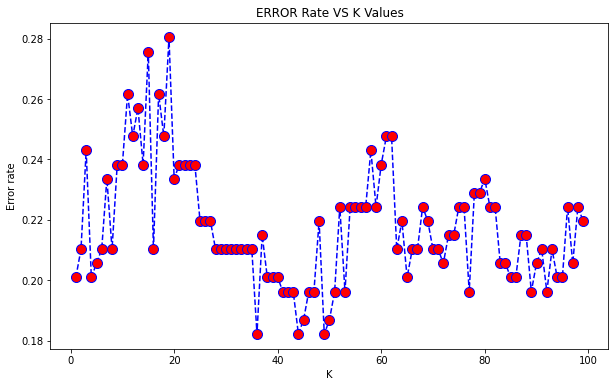

In [276]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_matrix,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('ERROR Rate VS K Values')
plt.xlabel('K')
plt.ylabel('Error rate')

LEAST ERROR LIES BETWEEN 1 AND 5. 2 IS THE BEST NUMBER OF NEIGHBOURS WE SHOULD HAVE FOR BEST RESULTS

## Q2

In [277]:
import pandas as pd

In [278]:
df = pd.read_csv('currency.csv')
df[["Day", "Year"]] = df["Date"].str.split(",", expand=True)
df[["Month", "Day"]] = df["Day"].str.split(" ", expand=True)
df = df.drop(['Date'], axis=1)
df = df.drop(['Day'], axis=1)

df['Month'] = df['Month'].map({"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12})

df["Change %"] = df["Change %"].str.replace('%', '')

df


,Price,Open,High,Low,Change %,Year,Month
0,150.820,146.950,150.885,146.950,0.04,2019,6
1,150.755,148.975,151.205,148.825,-0.09,2019,6
2,150.885,148.805,151.635,148.805,1.74,2019,6
3,148.310,146.920,148.470,146.920,0.08,2019,6
4,148.185,147.535,148.585,146.885,0.76,2019,6
...,...,...,...,...,...,...,...
5771,51.745,51.740,51.745,51.740,0.09,1999,6
5772,51.700,51.650,51.700,51.650,-0.06,1999,6
5773,51.730,51.710,51.730,51.710,0.04,1999,6
5774,51.710,51.670,51.710,51.670,0.12,1999,6


In [279]:
x=df.drop(['High'],axis=1)
y=df['High']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1)

In [280]:
## KNN

knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
# Mean Absolute Error
mean_absolute_error(Y_test,Y_pred)

0.1266064013840833

In [281]:
## Decision Tree

dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
Y_pred=dtr.predict(X_test)
# Mean Absolute Error
mean_absolute_error(Y_test,Y_pred)

0.09498197808535212

Decision tree is more accurate as it has less mean error